## Brazilian E-Commerce Data

### An analysis of E-Commerce data from Olist

the data can be found on Kaggle at [this link](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

<img src="data_schema.png" width=750>

### Note: This schema does not include the Product Categories dataset

# Table of Contents

Step 1: [Import Libraries and Data](#Step-1\)-Import-Libraries-and-Data)

Step 2: [Examine Datasets and Feature Engineering](#Step-2\)-Examine-Datasets-and-Feature-Engineering)

2a: [Sellers](#Sellers)

2b: [Product Categories](#Product-Categories)

2c: [Orders](#Orders)

2d: [Items](#Items)

2e: [Customers](#Customers)

2f: [Geolocation](#Geolocation)

2g: [Payments](#Payments)

2h: [Reviews](#Reviews)

2i: [Products](#Products)

2j: [Master Dataframe](#Master-Dataframe)

Step 3: [Visualize Datasets](#Step-3\)-Visualize-Datasets)

## Step 1) Import Libraries and Data

In [308]:
import pandas as pd
import glob
import os
import datetime as dt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates
import seaborn as sns

In [2]:
path = os.getcwd()
csv_files = glob.glob(path + "/*.csv")

csv_files

['/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_sellers_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/product_category_name_translation.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_orders_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_items_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_customers_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_geolocation_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_payments_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_reviews_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_products_dataset.csv']

In [3]:
df_list = [pd.read_csv(filename, index_col=None, header=0) for filename in csv_files]
df_list

[                             seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paulo          

In [4]:
sellers_df = df_list[0]
prod_cat_df = df_list[1]
orders_df = df_list[2]
items_df = df_list[3]
customers_df = df_list[4]
geolocation_df = df_list[5]
payments_df = df_list[6]
reviews_df = df_list[7]
products_df = df_list[8]

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>By importing the CSV files to a list, we're able to assign each one to a data frame using list indices.</li>
</div>


    



## Step 2) Examine Datasets and Feature Engineering

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' %x)

# Sellers

In [6]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [7]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype('str')
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].apply(lambda x: x.zfill(5))

In [9]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
cap_seller_city = sellers_df['seller_city'].str.title()
sellers_df['seller_city_state'] = cap_seller_city + ', ' + sellers_df['seller_state']
sellers_df['seller_city'] = sellers_df['seller_city'].str.title()
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP,"Campinas, SP"
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP,"Mogi Guacu, SP"
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ,"Rio De Janeiro, RJ"
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,Sao Paulo,SP,"Sao Paulo, SP"
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP,"Braganca Paulista, SP"
...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Sarandi,PR,"Sarandi, PR"
3091,f8201cab383e484733266d1906e2fdfa,88137,Palhoca,SC,"Palhoca, SC"
3092,74871d19219c7d518d0090283e03c137,04650,Sao Paulo,SP,"Sao Paulo, SP"
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Pelotas,RS,"Pelotas, RS"


In [11]:
sellers_df.duplicated().sum()

0

In [12]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_city_state         0
dtype: int64

In [13]:
sellers_df['seller_city_state'].nunique()

636

In [14]:
sellers_df['seller_state'].nunique()

23

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Changed Zip Code to a string and added leading zeroes.</li>
    <li>Capitalized city names.</li>
    <li>Created a new column that combined the city and state and capitalized the city name.</li>
</div>


    



<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Sellers come from all over Brazil including 636 cities from 23 states.</li>
</div>


    



<div class="alert alert-danger">
  <strong>Incomplete Task</strong>
    <li>Merge this df with geolocations.</li>
</div>


    



# Product Categories

In [15]:
prod_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [16]:
prod_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [17]:
cap_product = prod_cat_df['product_category_name_english'].str.title()
prod_cat_df['category_name_eng'] = cap_product
prod_cat_df.drop(prod_cat_df.columns[1], axis=1, inplace=True)
prod_cat_df

,product_category_name,category_name_eng
0,beleza_saude,Health_Beauty
1,informatica_acessorios,Computers_Accessories
2,automotivo,Auto
3,cama_mesa_banho,Bed_Bath_Table
4,moveis_decoracao,Furniture_Decor
...,...,...
66,flores,Flowers
67,artes_e_artesanato,Arts_And_Craftmanship
68,fraldas_higiene,Diapers_And_Hygiene
69,fashion_roupa_infanto_juvenil,Fashion_Childrens_Clothes


In [18]:
#prod_cat_df.drop(columns='product_category_name', inplace=True)

In [19]:
prod_cat_df.rename(columns={'category_name_eng':'category_name'}, inplace=True)

In [20]:
prod_cat_df.head()

,product_category_name,category_name
0,beleza_saude,Health_Beauty
1,informatica_acessorios,Computers_Accessories
2,automotivo,Auto
3,cama_mesa_banho,Bed_Bath_Table
4,moveis_decoracao,Furniture_Decor


In [21]:
prod_cat_df.duplicated().sum()

0

In [22]:
prod_cat_df.isna().sum()

product_category_name    0
category_name            0
dtype: int64

In [23]:
prod_cat_df['category_name'].nunique()

71

In [24]:
sorted(prod_cat_df['category_name'].unique())

['Agro_Industry_And_Commerce',
 'Air_Conditioning',
 'Art',
 'Arts_And_Craftmanship',
 'Audio',
 'Auto',
 'Baby',
 'Bed_Bath_Table',
 'Books_General_Interest',
 'Books_Imported',
 'Books_Technical',
 'Cds_Dvds_Musicals',
 'Christmas_Supplies',
 'Cine_Photo',
 'Computers',
 'Computers_Accessories',
 'Consoles_Games',
 'Construction_Tools_Construction',
 'Construction_Tools_Lights',
 'Construction_Tools_Safety',
 'Cool_Stuff',
 'Costruction_Tools_Garden',
 'Costruction_Tools_Tools',
 'Diapers_And_Hygiene',
 'Drinks',
 'Dvds_Blu_Ray',
 'Electronics',
 'Fashio_Female_Clothing',
 'Fashion_Bags_Accessories',
 'Fashion_Childrens_Clothes',
 'Fashion_Male_Clothing',
 'Fashion_Shoes',
 'Fashion_Sport',
 'Fashion_Underwear_Beach',
 'Fixed_Telephony',
 'Flowers',
 'Food',
 'Food_Drink',
 'Furniture_Bedroom',
 'Furniture_Decor',
 'Furniture_Living_Room',
 'Furniture_Mattress_And_Upholstery',
 'Garden_Tools',
 'Health_Beauty',
 'Home_Appliances',
 'Home_Appliances_2',
 'Home_Comfort_2',
 'Home_Confo

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Capitalized product categories</li>
    <li>Dropped the Portuguese names column and renamed the English names column</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Some of what appear to be the same categories are separated (e.g. Home_Appliances and Home_Appliances_2). We will examine those once we join the products and items datasets.</li>
</div>

# Orders

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_approved'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_df['delivered_to_carrier'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['delivered_to_customer'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['estimated_delivery_to_customer'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   order_id                        99441 non-null  object        
 1   customer_id                     99441 non-null  object        
 2   order_status                    99441 non-null  object        
 3   order_purchase_timestamp        99441 non-null  datetime64[ns]
 4   order_approved_at               99281 non-null  object        
 5   order_delivered_carrier_date    97658 non-null  object        
 6   order_delivered_customer_date   96476 non-null  object        
 7   order_estimated_delivery_date   99441 non-null  object        
 8   order_approved                  99281 non-null  datetime64[ns]
 9   delivered_to_carrier            97658 non-null  datetime64[ns]
 10  delivered_to_customer           96476 non-null  datetime64[ns]
 11  es

In [28]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [29]:
cols = [4,5,6,7]
orders_df.drop(orders_df.columns[cols], axis=1, inplace=True)

In [30]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   order_id                        99441 non-null  object        
 1   customer_id                     99441 non-null  object        
 2   order_status                    99441 non-null  object        
 3   order_purchase_timestamp        99441 non-null  datetime64[ns]
 4   order_approved                  99281 non-null  datetime64[ns]
 5   delivered_to_carrier            97658 non-null  datetime64[ns]
 6   delivered_to_customer           96476 non-null  datetime64[ns]
 7   estimated_delivery_to_customer  99441 non-null  datetime64[ns]
 8   order_month_year                99441 non-null  period[M]     
dtypes: datetime64[ns](5), object(3), period[M](1)
memory usage: 6.8+ MB


In [32]:
orders_df.duplicated().sum()

0

In [33]:
orders_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved                     160
delivered_to_carrier              1783
delivered_to_customer             2965
estimated_delivery_to_customer       0
order_month_year                     0
dtype: int64

In [34]:
orders_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [35]:
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Converted all delivery columns to datetime format, renamed columns, and dropped old columns.
    <li>Created a period column of just the month and year.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>There are 160 "approved orders" with null values.</li>
    <li>1783 orders have not been delivered to the carrier.</li>
    <li>2965 orders have yet to be delivered to the customer.</li>
    </div>

In [36]:
#Review rows with no approved dates
unapproved = orders_df[orders_df['order_approved'].isna()]
unapproved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,2018-08
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,2018-09
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,2017-03
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,2018-08
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,2017-05


In [37]:
#Confirming the order status of orders where approved = Null
unapproved['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Of the unapproved orders, 14 have already been delivered.</li>
        </div>

In [38]:
#Extract unapproved but delivered orders
unapproved_del = ((orders_df['order_approved'].isna()) & (orders_df['order_status'] == 'delivered'))
unapproved_del.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [39]:
#Update approved time for delivered orders to purchased time
orders_df.loc[unapproved_del, 'order_approved'] = orders_df.loc[unapproved_del, 'order_purchase_timestamp']
orders_df.loc[unapproved_del, :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,2017-02
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,2017-02
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,2017-02
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,2017-02
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,2017-02
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,2017-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,2017-02
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,2017-02
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,2017-01
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,2017-02


In [40]:
#Checking most recent order purchase
orders_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [41]:
#Checking to see if created but unapproved orders are recent
unapproved[unapproved['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11,2017-12
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07,2018-02
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12,2017-11
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08,2017-12
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01,2017-11


In [42]:
unapproved[unapproved['order_status'] == 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,2018-08
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,2018-09
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,2017-03
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,2018-08
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,2017-05
...,...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25,2017-07
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16,2017-09
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,2018-08
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,2018-08


<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Created a dataframe of unapproved orders (orders where order_approved = null).</li>
    <li>Created a dataframe of unapproved  but delivered orders (orders where order_approved = delivered).</li>
    <li>Imputed the values of the order_purchase_timestamp to unapproved but delivered orders.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Unapproved orders with the status of created are not recent. Unclear why they were never updated.</li>
</div>

In [43]:
#Review rows with no carrier dates
no_carrier = orders_df[orders_df['delivered_to_carrier'].isna()]
no_carrier.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-11
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,2016-10


In [44]:
#Confirming the order status of rows without carrier dates
no_carrier['order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [45]:
no_carrier['order_status'].value_counts(normalize=True)

unavailable   0.34
canceled      0.31
invoiced      0.18
processing    0.17
created       0.00
approved      0.00
delivered     0.00
Name: order_status, dtype: float64

In [46]:
#Checking if either of the delivered orders have been delivered to a customer
no_carrier.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,2017-09
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,2017-05


In [47]:
#Checking to see if processing orders are recent
no_carrier.query("order_status == 'processing'").sort_values(by='order_purchase_timestamp', ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
61386,8bc9548dbe844e1bf48ac197c5609045,d4dc57fd18dfe3e30be4d066d873d388,processing,2018-07-23 18:03:03,2018-07-24 10:32:19,NaT,NaT,2018-08-13,2018-07
28651,83fc33b62b8c7c39e2258d081955143d,c6eb22e4e7b7e5b871c06250c3296ef9,processing,2018-05-15 20:00:48,2018-05-17 02:55:42,NaT,NaT,2018-05-30,2018-05
20012,8124e0a6295df5f9ce4377ca0a8e0c18,6e14fc1f239d4384a91b043639b2e3b7,processing,2018-05-08 15:27:57,2018-05-09 17:36:39,NaT,NaT,2018-06-05,2018-05
15581,eb3c78fe8b35f52d4369d69d383fc212,263f9cd6ec31b2a2f80e4e26cb235335,processing,2018-05-07 22:40:38,2018-05-07 22:52:41,NaT,NaT,2018-06-04,2018-05
20069,57c432fd96e9d52639f048eb1b2a5b10,fdd0411bec46e2d9a15590016b897dc3,processing,2018-05-07 19:30:29,2018-05-09 04:31:31,NaT,NaT,2018-06-04,2018-05
...,...,...,...,...,...,...,...,...,...
31699,a68667474430fadbcfc1bfbb9e2adc0b,616fa20bdc978ccaf552b46fbc0567a5,processing,2017-01-18 20:48:59,2017-01-20 02:10:55,NaT,NaT,2017-03-06,2017-01
85488,6ed4f19dc97f2a4b5d0f15651247dbca,6b7e649105e4c5388bd8c3c4e9efcff3,processing,2017-01-18 09:52:32,2017-01-18 10:05:11,NaT,NaT,2017-02-28,2017-01
45181,255d951095fc26f86cc7a08b822b714a,4aa40fd3991ea64e9dead06fe15f021c,processing,2017-01-11 15:18:25,2017-01-11 15:30:11,NaT,NaT,2017-03-01,2017-01
53897,56eb381fff8db8d35134693062514084,b102a37db53345d7eb418649b096f8e8,processing,2016-10-09 12:34:53,2016-10-11 05:03:21,NaT,NaT,2016-12-30,2016-10


In [48]:
#Checking to see if created orders are recent
no_carrier.query("order_status == 'created'").sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01,2017-11
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12,2017-11
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11,2017-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08,2017-12
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07,2018-02


In [49]:
#Checking to see if invoiced orders are recent
no_carrier.query("order_status == 'invoiced'").sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
78824,dd359d3c294458c6d642b2eea9212bf5,5c58d1ea5a893380ecdd96dd6dfd5ec5,invoiced,2016-10-04 13:02:10,2016-10-05 03:08:27,NaT,NaT,2016-11-24,2016-10
24222,711b9be9c346d9ecdb9d38a5e1e7e39b,81e4aed5ab4253757305267b80712689,invoiced,2016-10-04 13:38:37,2016-10-04 14:08:38,NaT,NaT,2016-11-24,2016-10
32817,a6475bb7a50387e3c665534e15bd40ac,442d66f0d96f656096dd70f1b0391e40,invoiced,2016-10-04 16:28:25,2016-10-05 02:46:17,NaT,NaT,2016-11-28,2016-10
69926,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaT,NaT,2016-11-29,2016-10
57591,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaT,NaT,2016-11-25,2016-10
...,...,...,...,...,...,...,...,...,...
70615,b81dc96814c73196e795524a469a2c35,ed3f4ba1e8981bd3773207b41a9de82b,invoiced,2018-08-07 19:13:51,2018-08-07 19:25:15,NaT,NaT,2018-08-21,2018-08
82392,2da6df6ecc3f69f3642ce1fafad85d5a,d04b499809157673780addf5719f7af1,invoiced,2018-08-07 22:22:53,2018-08-07 22:35:23,NaT,NaT,2018-08-15,2018-08
35918,a03ac1d748cc1533566bf2c8199159d4,d89f76444e908c953bd1f8390aec9a00,invoiced,2018-08-09 06:43:29,2018-08-09 06:55:06,NaT,NaT,2018-08-24,2018-08
82498,67d06af97696c95df2bb26acf82db637,d3ddbbd220a088a3e353cd270c184e60,invoiced,2018-08-09 17:18:57,2018-08-09 17:50:12,NaT,NaT,2018-08-17,2018-08


In [50]:
delivered_no_carrier = ((orders_df['delivered_to_carrier'].isna()) & (orders_df['order_status'] == 'delivered'))

In [51]:
orders_df.loc[delivered_no_carrier, 'delivered_to_carrier'] = orders_df.loc[
    delivered_no_carrier, 'order_purchase_timestamp']
orders_df.loc[delivered_no_carrier,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-09-29 08:52:58,2017-11-20 19:44:47,2017-11-14,2017-09
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23,2017-05


<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Created a dataframe of orders that were never delivered to the carrier (orders where delivered_to_carrier = null).</li>
    <li>Imputed order_purchase_timestamp values to orders that were delivered, but have null values for delivered_to_carrier. </li>
        <li>Queried dataframe to check if orders with the order_status "created", "processing", or "invoiced" are recent.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>65% of orders that were never delivered to a carrier are either unavailable or cancelled.</li>
    <li>Of the remaining 35% that are labelled either created, processing, or invoiced, very few of them are recent. Unclear why they haven't been fulfilled yet.</li>
</div>

In [52]:
#Review rows with no delivery dates
undelivered = orders_df[orders_df['delivered_to_customer'].isna()]
undelivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-01


In [53]:
#Confirming the order status of orders without delivery dates
undelivered['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [54]:
undelivered['order_status'].value_counts(normalize=True)

shipped       0.37
canceled      0.21
unavailable   0.21
invoiced      0.11
processing    0.10
delivered     0.00
created       0.00
approved      0.00
Name: order_status, dtype: float64

In [55]:
undelivered.query("order_status == 'shipped'").sort_values(by='delivered_to_carrier')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
32371,0efd0bc268d34da3f01f4ff25a6d4335,95446917717bb58d553d107d0f1668f6,shipped,2016-10-07 15:53:31,2016-10-07 16:12:22,2016-10-11 16:12:23,NaT,2016-12-13,2016-10
18535,5cb8558cbb7c0c2f00f43468579d3e3c,2ff5a6455514da421bd25d6e4ceb1d12,shipped,2016-10-04 15:02:37,2016-10-05 03:10:59,2016-10-15 10:14:10,NaT,2016-12-02,2016-10
22948,3f913d30288c117e41ffe5cc74743dc9,7aae6b74d7e0a2a11051bf8a16e16021,shipped,2016-10-05 14:36:55,2016-10-06 15:53:06,2016-10-15 12:24:42,NaT,2016-11-29,2016-10
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,2016-09
34523,45973912e490866800c0aea8f63099c8,912f108a7026f25f99240a5c4c60e2c3,shipped,2016-10-07 22:45:28,2016-10-07 22:58:37,2016-10-26 13:18:16,NaT,2016-12-01,2016-10
...,...,...,...,...,...,...,...,...,...
24944,99b3fb1a943fa5d4af2a3386f00fdd19,aa03e52d50af7237a5963ffb09dd8872,shipped,2018-08-22 09:01:17,2018-08-22 09:10:17,2018-08-23 14:09:00,NaT,2018-08-30,2018-08
38209,2b59ddd3b4175dd13033a71b56785a33,a192e83217022c634d89c73d018d8251,shipped,2018-08-18 11:59:18,2018-08-20 11:33:14,2018-08-23 14:57:00,NaT,2018-08-28,2018-08
29651,f73b31435ce6dec43df056154c39a1ce,f0f671d4034e98cdf20f0c452d6db02b,shipped,2018-08-20 12:37:54,2018-08-20 15:35:42,2018-08-24 16:48:00,NaT,2018-08-27,2018-08
22575,6ca46f2b9a1592929647682510800e0e,13bf775a749925a15ef7cc1985b564f1,shipped,2018-08-24 17:02:19,2018-08-24 17:15:10,2018-08-27 15:15:00,NaT,2018-08-29,2018-08


In [56]:
#Checking rows marked as delivered but with Null values for Delivered to Customer
undelivered.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,2017-11
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,2018-06
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,2018-07
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,2018-07
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,2018-07
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23,2017-05
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,2018-06
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,2018-06


In [57]:
undelivered.query("order_status == 'invoiced'").sort_values(by='order_approved')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
24222,711b9be9c346d9ecdb9d38a5e1e7e39b,81e4aed5ab4253757305267b80712689,invoiced,2016-10-04 13:38:37,2016-10-04 14:08:38,NaT,NaT,2016-11-24,2016-10
32817,a6475bb7a50387e3c665534e15bd40ac,442d66f0d96f656096dd70f1b0391e40,invoiced,2016-10-04 16:28:25,2016-10-05 02:46:17,NaT,NaT,2016-11-28,2016-10
78824,dd359d3c294458c6d642b2eea9212bf5,5c58d1ea5a893380ecdd96dd6dfd5ec5,invoiced,2016-10-04 13:02:10,2016-10-05 03:08:27,NaT,NaT,2016-11-24,2016-10
57591,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaT,NaT,2016-11-25,2016-10
49189,60856ac7677a70cd87ad25d9b34d051b,bf3143805b420affe47047794eae0872,invoiced,2016-10-06 14:36:59,2016-10-06 15:41:47,NaT,NaT,2016-11-28,2016-10
...,...,...,...,...,...,...,...,...,...
83970,eb4d645f0a565f91e489a626b9b22334,4cf76a034161c9ca5e11089c3771c439,invoiced,2018-08-07 13:47:04,2018-08-08 07:10:13,NaT,NaT,2018-08-13,2018-08
81153,7737b48ac906ed0be3c192bb1fc4c4ef,710f79302fb4b836681bfd921167167b,invoiced,2018-08-07 09:48:08,2018-08-08 08:50:20,NaT,NaT,2018-08-14,2018-08
35918,a03ac1d748cc1533566bf2c8199159d4,d89f76444e908c953bd1f8390aec9a00,invoiced,2018-08-09 06:43:29,2018-08-09 06:55:06,NaT,NaT,2018-08-24,2018-08
82498,67d06af97696c95df2bb26acf82db637,d3ddbbd220a088a3e353cd270c184e60,invoiced,2018-08-09 17:18:57,2018-08-09 17:50:12,NaT,NaT,2018-08-17,2018-08


In [58]:
#Compute average delivery time
avg_delivery_time = (orders_df['delivered_to_customer'] - orders_df['delivered_to_carrier']).mean()
avg_delivery_time

Timedelta('9 days 07:56:37.872558978')

In [59]:
(orders_df['delivered_to_customer'] - orders_df['delivered_to_carrier']).describe()

count                        96476
mean     9 days 07:56:37.872558978
std      8 days 18:16:05.644389477
min             -17 days +21:41:31
25%         4 days 02:23:59.750000
50%                7 days 02:23:40
75%        12 days 00:42:04.250000
max              205 days 04:35:00
dtype: object

In [60]:
#Extract delivered orders with no delivery date
delivered_no_date = (orders_df['delivered_to_customer'].isna()) & (orders_df['order_status'] == 'delivered')

In [61]:
#Impute delivered_to_customer time values with the average delivery time
orders_df.loc[delivered_no_date, 'delivered_to_customer'] = orders_df.loc[delivered_no_date, 
                                                                       'delivered_to_carrier'] + avg_delivery_time
orders_df.loc[delivered_no_date,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-10 02:09:00.872558978,2017-12-18,2017-11
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-04 16:01:37.872558978,2018-07-16,2018-06
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30,2018-07
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30,2018-07
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-12 17:24:37.872558978,2018-07-24,2018-07
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,2017-06-04 07:19:20.872558978,2017-06-23,2017-05
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-21 22:06:37.872558978,2018-06-26,2018-06
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-13 03:22:37.872558978,2018-07-19,2018-06


In [62]:
#Compute delivery duration in days and hours for all orders
orders_df['delivery_duration'] = (orders_df['delivered_to_customer'] - orders_df['delivered_to_carrier'])
orders_df['delivery_hours'] = orders_df['delivery_duration']/dt.timedelta(hours=1)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,delivery_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,145.50
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,12 days 00:56:45,288.95
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9 days 04:16:29,220.27
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11,9 days 10:48:43,226.81
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,1 days 22:30:28,46.51


In [63]:
orders_df['delivery_duration'].describe()

count                        96484
mean     9 days 07:56:37.872558978
std      8 days 18:15:34.261396153
min             -17 days +21:41:31
25%         4 days 02:24:34.500000
50%                7 days 02:23:48
75%        12 days 00:41:23.750000
max              205 days 04:35:00
Name: delivery_duration, dtype: object

In [64]:
orders_df['delivery_hours'].describe()

count   96484.00
mean      223.94
std       210.26
min      -386.31
25%        98.41
50%       170.40
75%       288.69
max      4924.58
Name: delivery_hours, dtype: float64

In [65]:
#Checking how many orders have a negative delivery time
orders_df.loc[orders_df['delivery_hours'] < 0].shape

(23, 11)

In [66]:
#Dropping orders with a negative delivery time
orders_df.drop(orders_df.loc[orders_df['delivery_hours'] < 0].index, inplace=True)

In [67]:
orders_df.loc[orders_df['delivery_hours'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,delivery_hours


In [68]:
#Reexamining delivery hours after dropped negative delivery times
orders_df['delivery_hours'].describe()

count   96461.00
mean      224.02
std       210.23
min         0.00
25%        98.45
50%       170.41
75%       288.71
max      4924.58
Name: delivery_hours, dtype: float64

In [69]:
orders_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved                     146
delivered_to_carrier              1781
delivered_to_customer             2957
estimated_delivery_to_customer       0
order_month_year                     0
delivery_duration                 2957
delivery_hours                    2957
dtype: int64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Created a dataframe of orders that were never delivered.</li>
    <li>Queried dataframe to see how recent these undelivered orders are.</li>
    <li>Computed average delivery time and imputed values on orders marked as delivered.</li>
    <li>Created columns for delivery time in days and hours.</li>
    <li>Dropped observations with negative delivery times.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Over 20% of orders remain undelivered. Many are not recent, however their estimated delivery times are all soon after they were approved. Perhaps there was an error in the data entry process and these orders were delivered.</li>
    <li>Average delivery time is 9 days and 8 hours, while the median time is 7 days and 2 hours. Most are delivered in under two weeks, but there are a few outliers.</li>
</div>

# Items

In [70]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [71]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [72]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [73]:
items_df.duplicated().sum()

0

In [74]:
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [75]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [76]:
items_df['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [77]:
items_df['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [78]:
items_df['order_item_id'].value_counts(normalize=True)

1    0.88
2    0.09
3    0.02
4    0.01
5    0.00
6    0.00
7    0.00
8    0.00
9    0.00
10   0.00
11   0.00
12   0.00
13   0.00
14   0.00
15   0.00
16   0.00
17   0.00
18   0.00
19   0.00
20   0.00
21   0.00
Name: order_item_id, dtype: float64

In [79]:
items_df['price'].describe()

count   112650.00
mean       120.65
std        183.63
min          0.85
25%         39.90
50%         74.99
75%        134.90
max       6735.00
Name: price, dtype: float64

In [80]:
items_df['price'].value_counts(bins=[0,10,100,1000,7000]).sort_index()

(-0.001, 10.0]       1269
(10.0, 100.0]       71068
(100.0, 1000.0]     39469
(1000.0, 7000.0]      844
Name: price, dtype: int64

In [81]:
items_df['freight_value'].describe()

count   112650.00
mean        19.99
std         15.81
min          0.00
25%         13.08
50%         16.26
75%         21.15
max        409.68
Name: freight_value, dtype: float64

In [82]:
items_df['freight_value'].value_counts(bins=[0,10,100,500]).sort_index()

(-0.001, 10.0]    15898
(10.0, 100.0]     96081
(100.0, 500.0]      671
Name: freight_value, dtype: int64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Converted shipping limit date to datetime format.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Most customers only purchase 1 item per order, but over 10% order 2 or more.</li>
    <li>Most items cost between \$10 and \$100 but some cost over \$1000 and as much as \$6735.</li>
    <li>Most freight costs are between 85&cent; and &dollar;100.</li>
</div>

<div class="alert alert-danger">
  <strong>Incomplete Task</strong>
    <li>Potentially group orders here or wait to do them in the master frame.</li>
</div>

# Customers

In [83]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [84]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [85]:
customers_df.duplicated().sum()

0

In [86]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [87]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].apply(lambda x: x.zfill(5))

In [88]:
cap_cust_city = customers_df['customer_city'].str.title()
customers_df['customer_city_state'] = cap_cust_city + ', ' + customers_df['customer_state']
customers_df['customer_city'] = customers_df['customer_city'].str.title()
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,"Franca, SP"
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,Sao Bernardo Do Campo,SP,"Sao Bernardo Do Campo, SP"
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,Sao Paulo,SP,"Sao Paulo, SP"
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,Mogi Das Cruzes,SP,"Mogi Das Cruzes, SP"
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,"Campinas, SP"
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,Sao Paulo,SP,"Sao Paulo, SP"
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,Taboao Da Serra,SP,"Taboao Da Serra, SP"
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Fortaleza,CE,"Fortaleza, CE"
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Canoas,RS,"Canoas, RS"


In [89]:
customers_df['customer_zip_code_prefix'].nunique()

14994

In [90]:
customers_df['customer_city_state'].nunique()

4310

In [91]:
customers_df['customer_city_state'].value_counts().head(10)

Sao Paulo, SP                15540
Rio De Janeiro, RJ            6882
Belo Horizonte, MG            2773
Brasilia, DF                  2131
Curitiba, PR                  1521
Campinas, SP                  1444
Porto Alegre, RS              1379
Salvador, BA                  1245
Guarulhos, SP                 1189
Sao Bernardo Do Campo, SP      938
Name: customer_city_state, dtype: int64

In [92]:
customers_df['customer_city_state'].value_counts(normalize=True).head(10)

Sao Paulo, SP               0.16
Rio De Janeiro, RJ          0.07
Belo Horizonte, MG          0.03
Brasilia, DF                0.02
Curitiba, PR                0.02
Campinas, SP                0.01
Porto Alegre, RS            0.01
Salvador, BA                0.01
Guarulhos, SP               0.01
Sao Bernardo Do Campo, SP   0.01
Name: customer_city_state, dtype: float64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Changed Zip Code to a string and added leading zeroes.</li>
    <li>Capitalized city names.</li>
    <li>Created a new column that combined the city and state and capitalized the city name.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Customers come from all over Brazil including 4310 unique cities.</li>
    <li>Nearly 30% of customers live in just 4 cities: Sao Paulo, Rio, Belo Horizonte, and Brasilia.</li>
</div>


    



<div class="alert alert-danger">
  <strong>Incomplete Task</strong>
    <li>Merge this df with geolocations.</li>
</div>


    



# Geolocation

In [93]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [94]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP


In [95]:
geolocation_df['geolocation_zip_code_prefix'] = geolocation_df['geolocation_zip_code_prefix'].astype(
    str).apply(lambda x: x.zfill(5))

In [96]:
cap_geo_city = geolocation_df['geolocation_city'].str.title()
geolocation_df['geolocation_city_state'] = cap_geo_city + ', ' + geolocation_df['geolocation_state']
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].str.title()
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_city_state
0,01037,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
1,01046,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
2,01046,-23.55,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
3,01041,-23.54,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
4,01035,-23.54,-46.64,Sao Paulo,SP,"Sao Paulo, SP"
...,...,...,...,...,...,...
1000158,99950,-28.07,-52.01,Tapejara,RS,"Tapejara, RS"
1000159,99900,-27.88,-52.22,Getulio Vargas,RS,"Getulio Vargas, RS"
1000160,99950,-28.07,-52.01,Tapejara,RS,"Tapejara, RS"
1000161,99980,-28.39,-51.85,David Canabarro,RS,"David Canabarro, RS"


In [97]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
 5   geolocation_city_state       1000163 non-null  object 
dtypes: float64(2), object(4)
memory usage: 45.8+ MB


In [98]:
geolocation_df['geolocation_city_state'].nunique()

8463

In [99]:
geolocation_df['geolocation_zip_code_prefix'].nunique()

19015

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Changed Zip Code to a string and added leading zeroes.</li>
    <li>Capitalized city names.</li>
    <li>Created a new column that combined the city and state and capitalized the city name.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Olist's network comprises 8,463 unique cities across 19,015 unique zip codes.</li>
</div>


    



# Payments

In [100]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [101]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [102]:
payments_df.duplicated().sum()

0

In [103]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [104]:
cap_payment = payments_df['payment_type'].str.title()
payments_df['payment_type'] = cap_payment
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit_Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit_Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit_Card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,Boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,Credit_Card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,Credit_Card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,Credit_Card,5,369.54


In [105]:
payments_df['payment_sequential'].describe()

count   103886.00
mean         1.09
std          0.71
min          1.00
25%          1.00
50%          1.00
75%          1.00
max         29.00
Name: payment_sequential, dtype: float64

In [106]:
print(sorted(payments_df['payment_sequential'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [107]:
payments_df['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

In [108]:
payments_df['payment_sequential'].value_counts(bins=[0,5,10,20,30]).sort_index()

(-0.001, 5.0]    103428
(5.0, 10.0]         331
(10.0, 20.0]        109
(20.0, 30.0]         18
Name: payment_sequential, dtype: int64

In [109]:
payments_df['payment_type'].unique()

array(['Credit_Card', 'Boleto', 'Voucher', 'Debit_Card', 'Not_Defined'],
      dtype=object)

In [110]:
payments_df['payment_type'].value_counts()

Credit_Card    76795
Boleto         19784
Voucher         5775
Debit_Card      1529
Not_Defined        3
Name: payment_type, dtype: int64

In [111]:
payments_df['payment_type'].value_counts(normalize=True)

Credit_Card   0.74
Boleto        0.19
Voucher       0.06
Debit_Card    0.01
Not_Defined   0.00
Name: payment_type, dtype: float64

In [112]:
payments_df['payment_installments'].describe()

count   103886.00
mean         2.85
std          2.69
min          0.00
25%          1.00
50%          1.00
75%          4.00
max         24.00
Name: payment_installments, dtype: float64

In [113]:
print(sorted(payments_df['payment_installments'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24]


In [114]:
payments_df['payment_installments'].value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

In [115]:
payments_df['payment_installments'].value_counts(bins=[0,5,10,15,20,25]).sort_index()

(-0.001, 5.0]    87759
(5.0, 10.0]      15786
(10.0, 15.0]       261
(15.0, 20.0]        57
(20.0, 25.0]        23
Name: payment_installments, dtype: int64

In [116]:
payments_df['payment_installments'].value_counts(normalize=True)

1    0.51
2    0.12
3    0.10
4    0.07
10   0.05
5    0.05
8    0.04
6    0.04
7    0.02
9    0.01
12   0.00
15   0.00
18   0.00
11   0.00
24   0.00
20   0.00
13   0.00
14   0.00
17   0.00
16   0.00
21   0.00
0    0.00
22   0.00
23   0.00
Name: payment_installments, dtype: float64

In [117]:
payments_df['payment_value'].describe()

count   103886.00
mean       154.10
std        217.49
min          0.00
25%         56.79
50%        100.00
75%        171.84
max      13664.08
Name: payment_value, dtype: float64

In [118]:
payments_df['payment_value'].value_counts(bins=[0,10,100,1000,10000,14000]).sort_index()

(-0.001, 10.0]         1491
(10.0, 100.0]         50619
(100.0, 1000.0]       50626
(1000.0, 10000.0]      1149
(10000.0, 14000.0]        1
Name: payment_value, dtype: int64

In [119]:
payments_df['payment_value'].value_counts(bins=[0,10,100,1000,10000,14000], normalize=True).sort_index()

(-0.001, 10.0]       0.01
(10.0, 100.0]        0.49
(100.0, 1000.0]      0.49
(1000.0, 10000.0]    0.01
(10000.0, 14000.0]   0.00
Name: payment_value, dtype: float64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Capitalized payment type.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>The overwhelming majority of people complete their purchase with a single form of payment, but a small percentage choose to spread it out over multiple FOPs. (Payment Sequential)</li>
    <li>3/4 of customers pay by credit card but other methods are popular too such as Bolero and Voucher.</li>
    <li>Just over half of customers pay the full amount of their purchase in one installment. Another 20% pay in either 2 or 3 installments. Some pay in as many as 24.</li>
    <li>An almost even number of purchases (as well as 98% of all purchases) were in the \$10 to \$100 range and the \$100 to \$1000 range. 
</div>


    



# Reviews

In [120]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [121]:
reviews_df.head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [122]:
reviews_df.duplicated().sum()

0

In [123]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [124]:
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], format=
                                                       '%Y-%m-%d %H:%M:%S')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], format=
                                             '%Y-%m-%d %H:%M:%S')

In [125]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [126]:
reviews_df['review_score'].describe()

count   99224.00
mean        4.09
std         1.35
min         1.00
25%         4.00
50%         5.00
75%         5.00
max         5.00
Name: review_score, dtype: float64

In [127]:
reviews_df['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [128]:
reviews_df['review_score'].value_counts(normalize=True).sort_index(ascending=False)

5   0.58
4   0.19
3   0.08
2   0.03
1   0.12
Name: review_score, dtype: float64

In [129]:
reviews_df['response_time'] = reviews_df['review_answer_timestamp'] - reviews_df['review_creation_date']
reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30,7 days 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42,2 days 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1 days 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13,1 days 12:59:13


In [130]:
reviews_df['response_time'].describe()

count                        99224
mean     3 days 03:34:33.029700475
std      9 days 21:21:40.258026234
min                0 days 02:08:29
25%         1 days 00:07:00.750000
50%         1 days 16:11:55.500000
75%                3 days 02:29:08
max              518 days 16:46:52
Name: response_time, dtype: object

In [131]:
reviews_df['review_comment_title'].value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [132]:
reviews_df['review_comment_title'].value_counts().head(50)

Recomendo               423
recomendo               345
Bom                     293
super recomendo         270
Excelente               248
Muito bom               247
Ótimo                   240
Super recomendo         217
Ótimo                   207
Otimo                   174
10                      158
Excelente               119
otimo                   105
bom                      97
Muito bom                87
Boa                      86
Recomendo                62
Perfeito                 57
Ótima                    55
Bom                      55
super recomendado        55
RECOMENDO                55
Não recomendo            54
muito bom                54
SUPER RECOMENDO          51
Ruim                     47
excelente                44
não recomendo            44
Ótimo produto            44
Ótima                    41
Super Recomendo          39
Nota 10                  39
Entrega rápida           38
Produto errado           38
Ok                       37
recomendado         

In [133]:
reviews_df['review_comment_title'].isna().value_counts()

True     87656
False    11568
Name: review_comment_title, dtype: int64

In [134]:
reviews_df['review_comment_title'].isna().value_counts(normalize=True)

True    0.88
False   0.12
Name: review_comment_title, dtype: float64

In [135]:
reviews_df['review_comment_message'].isna().value_counts()

True     58247
False    40977
Name: review_comment_message, dtype: int64

In [136]:
reviews_df['review_comment_message'].isna().value_counts(normalize=True)

True    0.59
False   0.41
Name: review_comment_message, dtype: float64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Converted review creation date and answer timestamp to datetime objects.</li>
    <li>Created a column to measure response to review time.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Reviews are generally positive with nearly 80% being 4 or 5 stars</li>
    <li>Response time to reviews is very quick with the median being about 40 hours and the average being 3 days.</li>
    <li>All reviews have a score, but only 12% of reviews have a comment title and 41% have a comment message.</li>
</div>


    



# Products

In [137]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [138]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [139]:
products_df.rename(columns = {'product_name_lenght':'product_name_length', 'product_description_lenght':'product_description_length'}, inplace = True)

In [140]:
products_df['product_id'] = products_df['product_id'].astype('str')

In [141]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [142]:
products_df.duplicated().sum()

0

In [143]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [144]:
products_df[products_df['product_name_length'].isna()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.00,17.00,14.00,12.00
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.00,16.00,7.00,20.00
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.00,20.00,20.00,20.00
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.00,41.00,30.00,41.00
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.00,35.00,7.00,12.00
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.00,30.00,20.00,70.00
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.00,30.00,10.00,23.00
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.00,21.00,8.00,16.00
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.00,45.00,16.00,45.00


In [145]:
#Drop all Null rows
#products_df.dropna(axis=0, inplace=True)

In [146]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_length              66
product_description_length     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [147]:
cap_product1 = products_df['product_category_name'].str.title()
products_df['product_category_name'] = cap_product1
products_df

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Moveis_Decoracao,45.00,67.00,2.00,12300.00,40.00,40.00,40.00
32947,bf4538d88321d0fd4412a93c974510e6,Construcao_Ferramentas_Iluminacao,41.00,971.00,1.00,1700.00,16.00,19.00,16.00
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Cama_Mesa_Banho,50.00,799.00,1.00,1400.00,27.00,7.00,27.00
32949,83808703fc0706a22e264b9d75f04a2e,Informatica_Acessorios,60.00,156.00,2.00,700.00,31.00,13.00,20.00


In [148]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_length              66
product_description_length     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

<div class="alert alert-success">
  <strong>Summary of Findings</strong>
    <li>Dropped products with Null values.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Somehow products with Null values for product_category_name, product_name_length, product_description_length, and product_photos_qty have values for product_weight/length/height/width.</li>
    <li>Number of unique values didnt change after dropping nulls. All observation types still represented.</li>
</div>

In [149]:
products_df

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Moveis_Decoracao,45.00,67.00,2.00,12300.00,40.00,40.00,40.00
32947,bf4538d88321d0fd4412a93c974510e6,Construcao_Ferramentas_Iluminacao,41.00,971.00,1.00,1700.00,16.00,19.00,16.00
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Cama_Mesa_Banho,50.00,799.00,1.00,1400.00,27.00,7.00,27.00
32949,83808703fc0706a22e264b9d75f04a2e,Informatica_Acessorios,60.00,156.00,2.00,700.00,31.00,13.00,20.00


In [150]:
products_df['product_category_name'].nunique()

73

In [151]:
print(products_df['product_category_name'].unique())

['Perfumaria' 'Artes' 'Esporte_Lazer' 'Bebes' 'Utilidades_Domesticas'
 'Instrumentos_Musicais' 'Cool_Stuff' 'Moveis_Decoracao'
 'Eletrodomesticos' 'Brinquedos' 'Cama_Mesa_Banho'
 'Construcao_Ferramentas_Seguranca' 'Informatica_Acessorios'
 'Beleza_Saude' 'Malas_Acessorios' 'Ferramentas_Jardim'
 'Moveis_Escritorio' 'Automotivo' 'Eletronicos' 'Fashion_Calcados'
 'Telefonia' 'Papelaria' 'Fashion_Bolsas_E_Acessorios' 'Pcs'
 'Casa_Construcao' 'Relogios_Presentes'
 'Construcao_Ferramentas_Construcao' 'Pet_Shop' 'Eletroportateis'
 'Agro_Industria_E_Comercio' nan 'Moveis_Sala' 'Sinalizacao_E_Seguranca'
 'Climatizacao' 'Consoles_Games' 'Livros_Interesse_Geral'
 'Construcao_Ferramentas_Ferramentas' 'Fashion_Underwear_E_Moda_Praia'
 'Fashion_Roupa_Masculina'
 'Moveis_Cozinha_Area_De_Servico_Jantar_E_Jardim'
 'Industria_Comercio_E_Negocios' 'Telefonia_Fixa'
 'Construcao_Ferramentas_Iluminacao' 'Livros_Tecnicos'
 'Eletrodomesticos_2' 'Artigos_De_Festas' 'Bebidas' 'Market_Place'
 'La_Cuisine' 'Const

In [152]:
products_df['product_description_length'].describe()

count   32341.00
mean      771.50
std       635.12
min         4.00
25%       339.00
50%       595.00
75%       972.00
max      3992.00
Name: product_description_length, dtype: float64

In [153]:
products_df['product_description_length'].value_counts(bins=[0,500,1000,2000,4000]).sort_index()

(-0.001, 500.0]     13449
(500.0, 1000.0]     11144
(1000.0, 2000.0]     5907
(2000.0, 4000.0]     1841
Name: product_description_length, dtype: int64

In [154]:
products_df['product_photos_qty'].describe()

count   32341.00
mean        2.19
std         1.74
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        20.00
Name: product_photos_qty, dtype: float64

In [155]:
products_df['product_photos_qty'].value_counts()

1.00     16489
2.00      6263
3.00      3860
4.00      2428
5.00      1484
6.00       968
7.00       343
8.00       192
9.00       105
10.00       95
11.00       46
12.00       35
13.00        9
15.00        8
17.00        7
14.00        5
18.00        2
20.00        1
19.00        1
Name: product_photos_qty, dtype: int64

In [156]:
products_df['product_photos_qty'].value_counts(normalize=True)

1.00    0.51
2.00    0.19
3.00    0.12
4.00    0.08
5.00    0.05
6.00    0.03
7.00    0.01
8.00    0.01
9.00    0.00
10.00   0.00
11.00   0.00
12.00   0.00
13.00   0.00
15.00   0.00
17.00   0.00
14.00   0.00
18.00   0.00
20.00   0.00
19.00   0.00
Name: product_photos_qty, dtype: float64

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Renamed columns to correct spelling errors.</li>
    <li>Capitalized product names.</li>
</div>

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>There are 73 unique product category name.</li>
    <li>Product description length varies considerably with most being under 1000 characters. However some have as many as ~4000.</li>
    <li>Most products have 1-3 photos. Some have up to 10 and several have as many as 20.</li>
</div>


    



In [157]:
prod_cat_df['product_category_name'] = prod_cat_df['product_category_name'].str.title()
prod_df = pd.merge(products_df, prod_cat_df, how='inner', on='product_category_name')
prod_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00,Perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,Perfumaria,39.00,346.00,2.00,400.00,27.00,5.00,20.00,Perfumery
2,0d009643171aee696f4733340bc2fdd0,Perfumaria,52.00,150.00,1.00,422.00,21.00,16.00,18.00,Perfumery
3,b1eae565a61935e0011ee7682fef9dc9,Perfumaria,49.00,460.00,2.00,267.00,17.00,13.00,17.00,Perfumery
4,8da90b37f0fb171b4877c124f965b1f6,Perfumaria,56.00,733.00,3.00,377.00,18.00,13.00,15.00,Perfumery


# Master Dataframe

In [158]:
master_df = orders_df.merge(payments_df, on='order_id') \
    .merge(customers_df, on='customer_id') \
        .merge(items_df, on='order_id') \
            .merge(prod_df, on='product_id') \
                    .merge(sellers_df, on='seller_id') \

In [159]:
master_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,delivery_hours,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,145.50,1,Credit_Card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,03149,Sao Paulo,SP,"Sao Paulo, SP",1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Utilidades_Domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,Housewares,09350,Maua,SP,"Maua, SP"
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,145.50,3,Voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,03149,Sao Paulo,SP,"Sao Paulo, SP",1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Utilidades_Domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,Housewares,09350,Maua,SP,"Maua, SP"
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,145.50,2,Voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,03149,Sao Paulo,SP,"Sao Paulo, SP",1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Utilidades_Domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,Housewares,09350,Maua,SP,"Maua, SP"
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2017-08,0 days 23:16:10,23.27,1,Credit_Card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,03366,Sao Paulo,SP,"Sao Paulo, SP",1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,Utilidades_Domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,Housewares,09350,Maua,SP,"Maua, SP"
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,2017-08,3 days 00:54:18,72.91,1,Credit_Card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,02290,Sao Paulo,SP,"Sao Paulo, SP",1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,Utilidades_Domesticas,40.00,268.00,4.00,500.00,19.00,8.00,13.00,Housewares,09350,Maua,SP,"Maua, SP"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115815,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,2018-07,5 days 00:32:57,120.55,1,Boleto,1,93.13,2077f7ec37df79c62cc24b7b8f30e8c9,08528,Ferraz De Vasconcelos,SP,"Ferraz De Vasconcelos, SP",1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,Construcao_Ferramentas_Iluminacao,40.00,516.00,2.00,750.00,30.00,28.00,28.00,Construction_Tools_Lights,13660,Porto Ferreira,SP,"Porto Ferreira, SP"
115816,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,2017-03,NaT,NaN,1,Credit_Card,1

In [160]:
master_df.duplicated().sum()

0

In [161]:
master_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved                       0
delivered_to_carrier              1203
delivered_to_customer             2487
estimated_delivery_to_customer       0
order_month_year                     0
delivery_duration                 2487
delivery_hours                    2487
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
customer_city_state                  0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value            

In [162]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115820 entries, 0 to 115819
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   order_id                        115820 non-null  object         
 1   customer_id                     115820 non-null  object         
 2   order_status                    115820 non-null  object         
 3   order_purchase_timestamp        115820 non-null  datetime64[ns] 
 4   order_approved                  115820 non-null  datetime64[ns] 
 5   delivered_to_carrier            114617 non-null  datetime64[ns] 
 6   delivered_to_customer           113333 non-null  datetime64[ns] 
 7   estimated_delivery_to_customer  115820 non-null  datetime64[ns] 
 8   order_month_year                115820 non-null  period[M]      
 9   delivery_duration               113333 non-null  timedelta64[ns]
 10  delivery_hours                  113333 non-n

## Step 3) Visualize Datasets

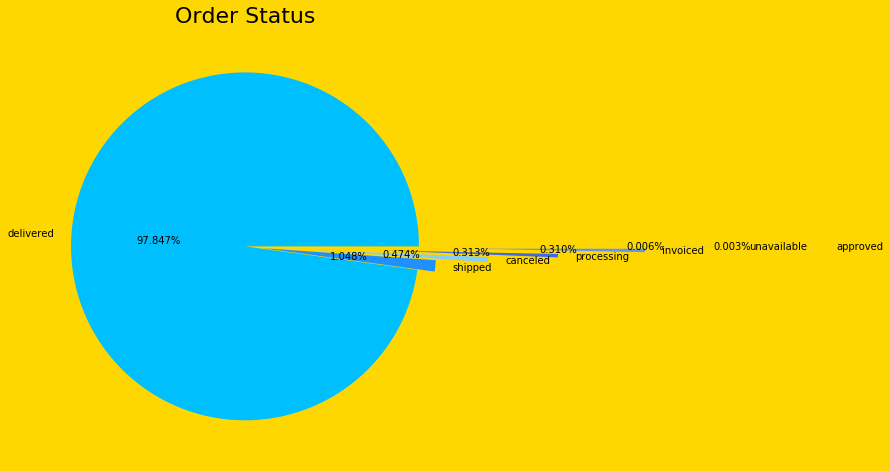

In [303]:
vc = master_df['order_status'].value_counts()
labels = vc.index
explode = (0, 0.1, .4 , .8, 1.3, 1.8, 2.3)

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(master_df['order_status'].value_counts(), explode=explode, labels=labels, colors=colors, autopct='%1.3f%%', pctdistance=.5)
plt.title('Order Status', fontsize=22)
plt.show()

In [334]:
master_df.groupby(['order_month_year'])['payment_value'].sum().sort_index()

order_month_year
2016-09       347.52
2016-10     72910.10
2016-12        19.62
2017-01    185320.62
2017-02    332265.31
2017-03    517256.51
2017-04    493438.43
2017-05    709469.44
2017-06    591674.68
2017-07    726559.23
2017-08    861096.70
2017-09   1005176.95
2017-10    991931.50
2017-11   1565721.40
2017-12   1022777.73
2018-01   1374723.23
2018-02   1288090.24
2018-03   1451515.86
2018-04   1486213.40
2018-05   1499463.18
2018-06   1294651.03
2018-07   1343682.04
2018-08   1224172.19
2018-09       166.46
Freq: M, Name: payment_value, dtype: float64

In [335]:
revenue_over_time = master_df.groupby(['order_month_year'])['payment_value'].sum().sort_index()

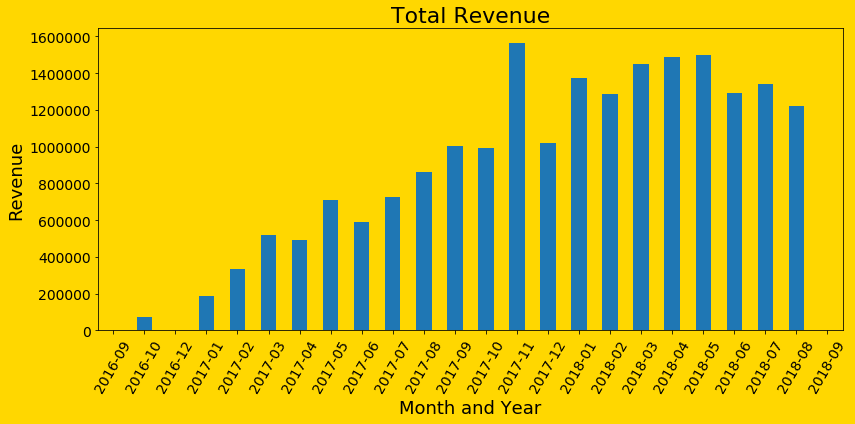

In [343]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
revenue_over_time.plot(kind='bar')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Total Revenue', fontsize=22)
plt.tight_layout()
plt.show()

In [348]:
avg_rev_over_time = master_df.groupby(['order_month_year'])['payment_value'].median().sort_index()

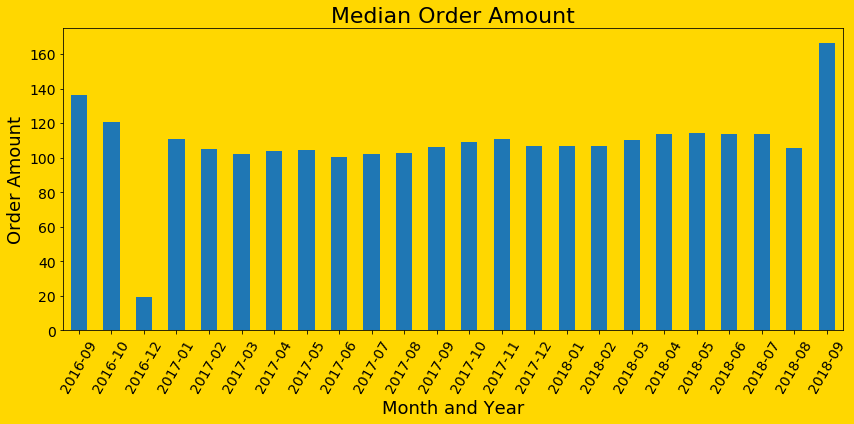

In [350]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
avg_rev_over_time.plot(kind='bar')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Order Amount', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Median Order Amount', fontsize=22)
plt.tight_layout()
plt.show()

## Customer Behavior

In [163]:
master_df.groupby(['customer_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
SP,7495117.89
RJ,2735903.70
MG,2299102.47
RS,1126905.94
PR,1053724.99
BA,786125.16
SC,775148.07
GO,503539.86
DF,429150.39


In [164]:
state_payments = master_df.groupby(['customer_state'])['payment_value'].sum().sort_values().tail(7)

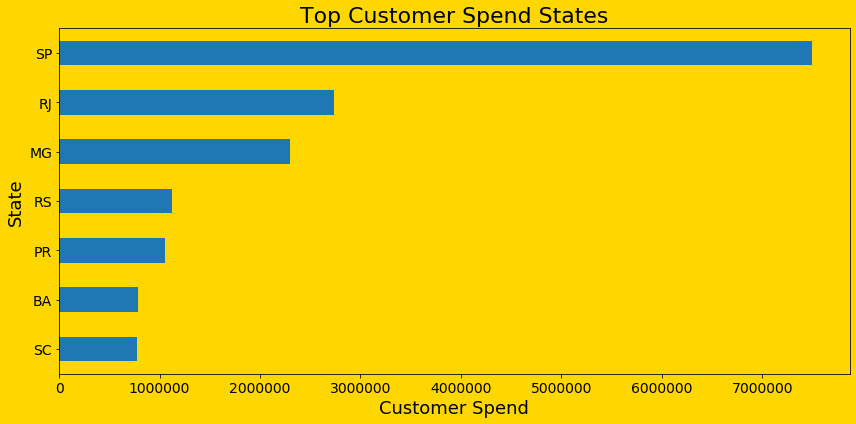

In [165]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
state_payments.plot(kind='barh')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Customer Spend States', fontsize=22)
plt.tight_layout()
plt.show()

In [166]:
master_df.groupby(['customer_state']).agg({
    'payment_value':'median'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
AC,186.83
RR,167.24
AP,166.60
RO,158.81
PB,155.45
PI,152.88
PA,148.09
SE,144.12
RN,140.16


In [167]:
median_state_payments = master_df.groupby(['customer_state'])\
['payment_value'].median().sort_values().tail(10)

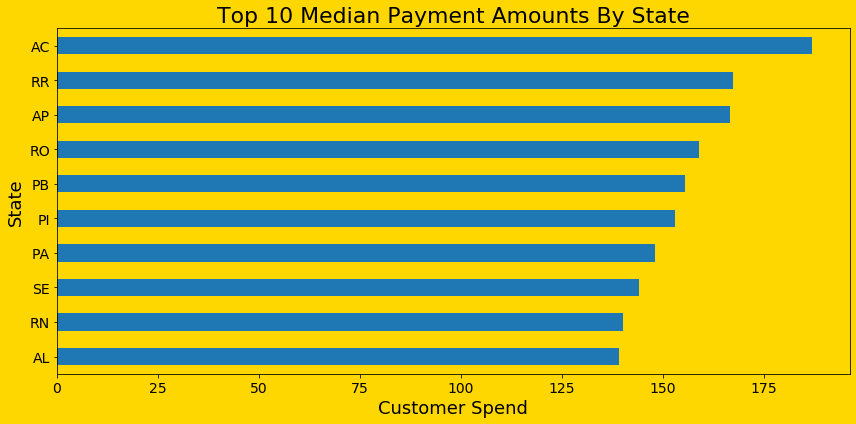

In [168]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
median_state_payments.plot(kind='barh')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Median Payment Amounts By State', fontsize=22)
plt.tight_layout()
plt.show()

In [169]:
master_df.groupby(['customer_city', 'customer_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,,payment_value
customer_city,customer_state,
Sao Paulo,SP,2795540.85
Rio De Janeiro,RJ,1550270.27
Belo Horizonte,MG,493136.93
Brasilia,DF,427060.18
Curitiba,PR,326973.12
Porto Alegre,RS,311122.56
Salvador,BA,284146.03
Campinas,SP,263019.11
Goiania,GO,209340.67


In [170]:
city_state_payments = master_df.groupby(['customer_city', 'customer_state'])\
['payment_value'].sum().sort_values().tail(7)

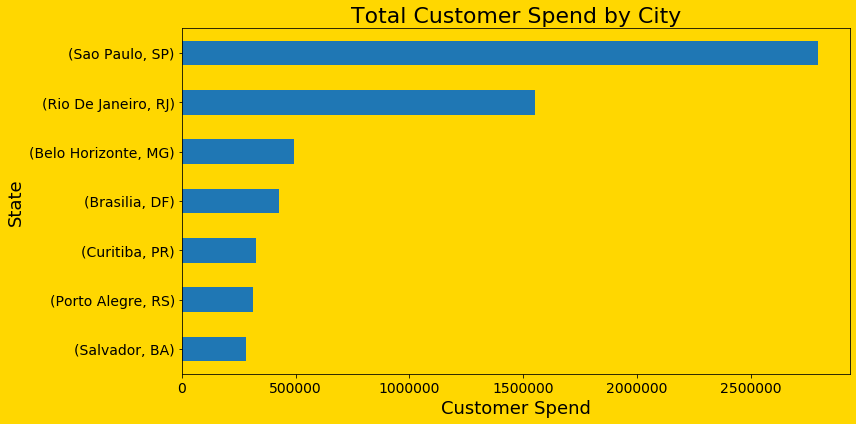

In [171]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
city_state_payments.plot(kind='barh')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Customer Spend by City', fontsize=22)
plt.tight_layout()
plt.show()

In [172]:
master_df.groupby(['customer_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
SP,7495117.89
RJ,2735903.70
MG,2299102.47
RS,1126905.94
PR,1053724.99
BA,786125.16
SC,775148.07
GO,503539.86
DF,429150.39


In [173]:
master_df['customer_city_state'].value_counts().sort_values(ascending=False).head(7)

Sao Paulo, SP         18267
Rio De Janeiro, RJ     8065
Belo Horizonte, MG     3187
Brasilia, DF           2425
Curitiba, PR           1792
Campinas, SP           1714
Porto Alegre, RS       1626
Name: customer_city_state, dtype: int64

In [174]:
most_transac = master_df['customer_city_state'].value_counts().sort_values(ascending=True).tail(7)

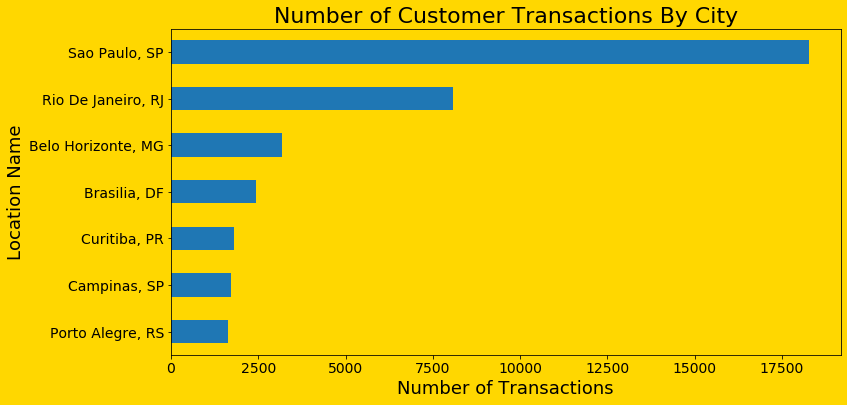

In [175]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
most_transac.plot(kind='barh')
plt.xlabel('Number of Transactions', fontsize=18)
plt.ylabel('Location Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Customer Transactions By City', fontsize=22)
plt.show()

In [176]:
master_df['customer_zip_code_prefix'].value_counts().sort_values(ascending=
                                                                 False).head(10).sort_values(ascending=False)

24220    154
22790    153
22793    151
24230    135
22775    125
35162    123
29101    119
11740    110
13087    106
36570    104
Name: customer_zip_code_prefix, dtype: int64

In [177]:
top_10_cust_zip = master_df['customer_zip_code_prefix'].value_counts().sort_values().tail(10)

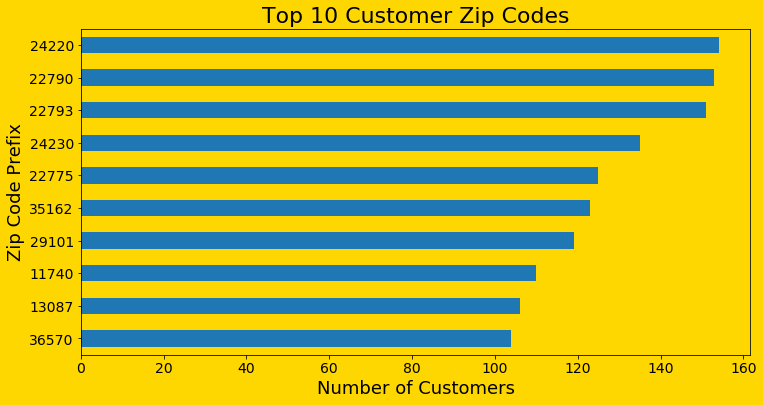

In [178]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_cust_zip.plot(kind='barh')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Customer Zip Codes', fontsize=22)
plt.show()

## Seller Behavior

In [179]:
master_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

Sao Paulo, SP                28903
Ibitinga, SP                  8194
Santo Andre, SP               3091
Curitiba, PR                  3022
Sao Jose Do Rio Preto, SP     2676
Belo Horizonte, MG            2464
Rio De Janeiro, RJ            2452
Ribeirao Preto, SP            2339
Maringa, PR                   2257
Guarulhos, SP                 2050
Name: seller_city_state, dtype: int64

In [180]:
top_10_sell_city = master_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(7)

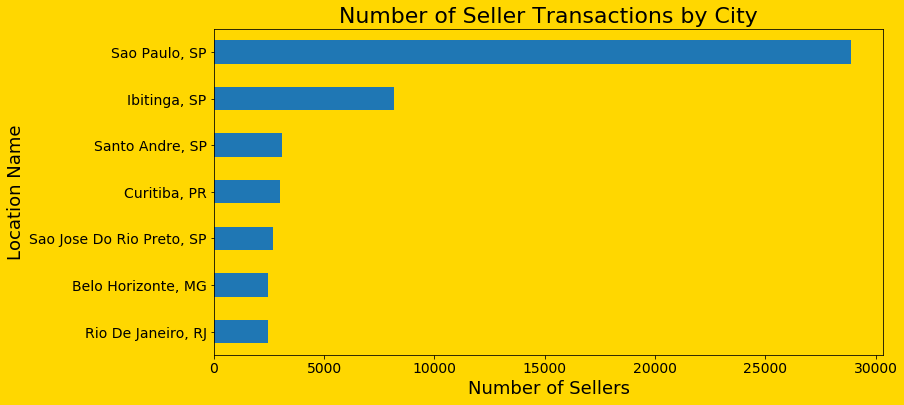

In [181]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_city.plot(kind='barh')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Location Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Seller Transactions by City', fontsize=22)
plt.show()

In [182]:
master_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

14940    8194
05849    2137
15025    2089
09015    1853
13405    1642
04782    1547
08577    1544
03204    1462
04160    1267
13232    1254
Name: seller_zip_code_prefix, dtype: int64

In [183]:
top_10_sell_zip = master_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10)

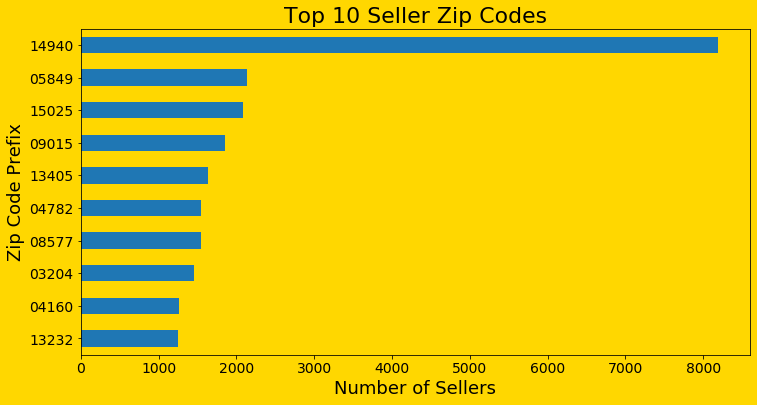

In [184]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_zip.plot(kind='barh')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Seller Zip Codes', fontsize=22)
plt.show()

# Payment Behavior

In [185]:
master_df.groupby(['payment_type']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
payment_type,
Credit_Card,15394024.92
Boleto,3997932.21
Voucher,397565.35
Debit_Card,249120.89


In [186]:
master_df.groupby(['payment_type']).agg(
    {'payment_value':'sum'}).sort_values(by='payment_value', ascending=False) / master_df['payment_value'].sum()

,payment_value
payment_type,
Credit_Card,0.77
Boleto,0.20
Voucher,0.02
Debit_Card,0.01


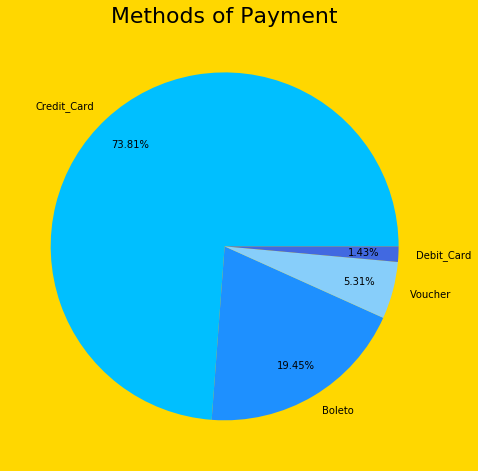

In [187]:
vc = master_df['payment_type'].value_counts()
labels = vc.index

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(master_df['payment_type'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', pctdistance=.8)
plt.title('Methods of Payment', fontsize=22)
plt.show()

In [188]:
master_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

2017-11    8883
2018-03    8406
2018-01    8324
2018-04    8182
2018-05    8166
2018-02    7797
2018-08    7424
2018-06    7366
2018-07    7272
2017-12    6414
Freq: M, Name: order_month_year, dtype: int64

In [189]:
top_10_orders = master_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10)

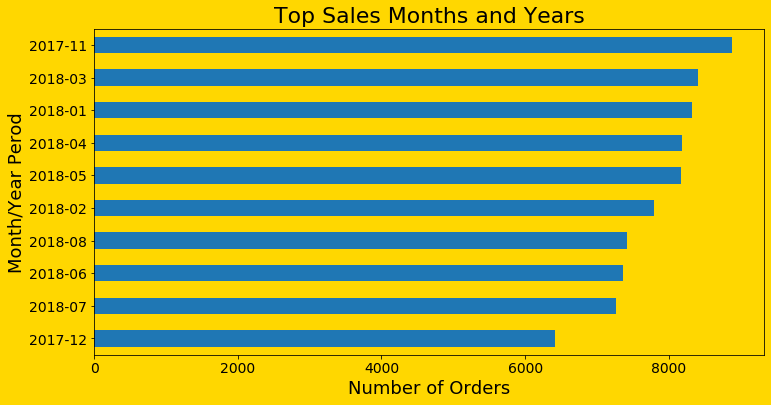

In [190]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_orders.plot(kind='barh')
plt.xlabel('Number of Orders', fontsize=18)
plt.ylabel('Month/Year Perod', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Sales Months and Years', fontsize=22)
plt.show()

In [191]:
master_df['customer_city_state'].value_counts().sort_values(ascending=
                                                                       True).tail(10).sort_values(ascending=False)

Sao Paulo, SP                18267
Rio De Janeiro, RJ            8065
Belo Horizonte, MG            3187
Brasilia, DF                  2425
Curitiba, PR                  1792
Campinas, SP                  1714
Porto Alegre, RS              1626
Salvador, BA                  1488
Guarulhos, SP                 1383
Sao Bernardo Do Campo, SP     1089
Name: customer_city_state, dtype: int64

In [192]:
top_10_cust_citystate = master_df['customer_city_state'].value_counts().sort_values(ascending=True).tail(10)

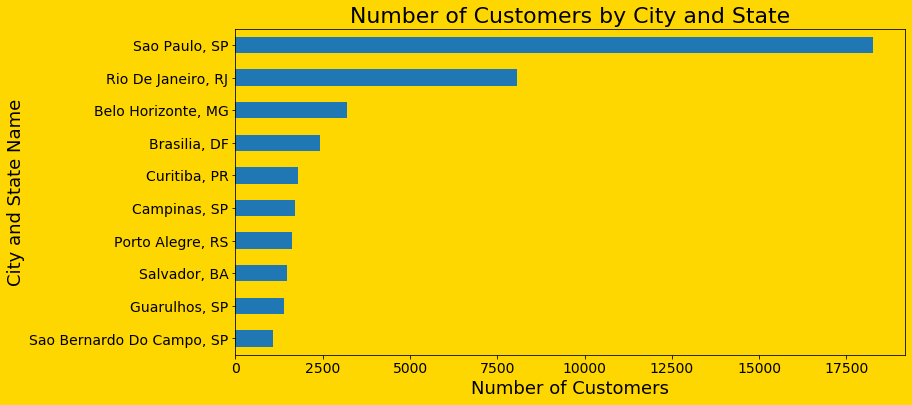

In [193]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_cust_citystate.plot(kind='barh')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('City and State Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Customers by City and State', fontsize=22)
plt.show()

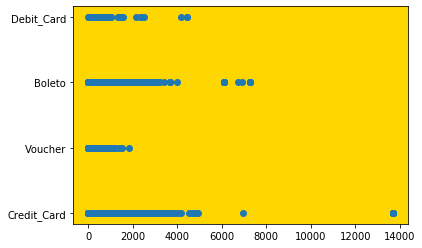

In [194]:
plt.scatter(master_df['payment_value'], master_df['payment_type'])

In [195]:
top_pay_type = master_df['payment_type'].value_counts().sort_values(ascending=True)

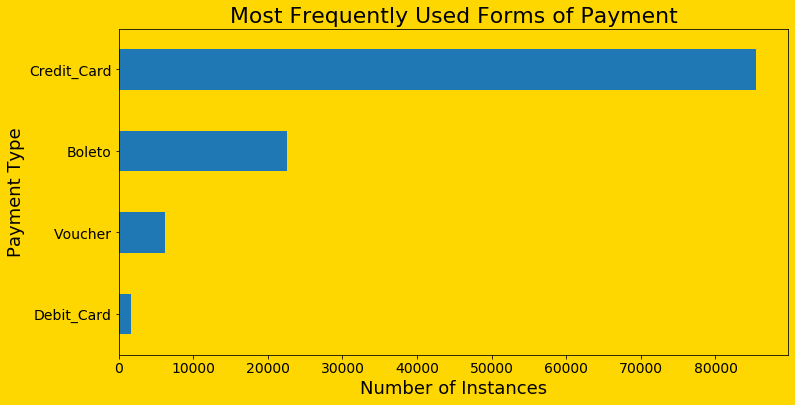

In [196]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_type.plot(kind='barh')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Payment Type', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Most Frequently Used Forms of Payment', fontsize=22)
plt.show()

In [204]:
master_df['payment_installments'].value_counts().sort_values(ascending=False).head(10)

1     57680
2     13465
3     11578
4      7877
10     6788
5      5939
8      5005
6      4549
7      1791
9       717
Name: payment_installments, dtype: int64

In [209]:
top_pay_install = master_df['payment_installments'].value_counts().sort_values(ascending=True).tail(7)

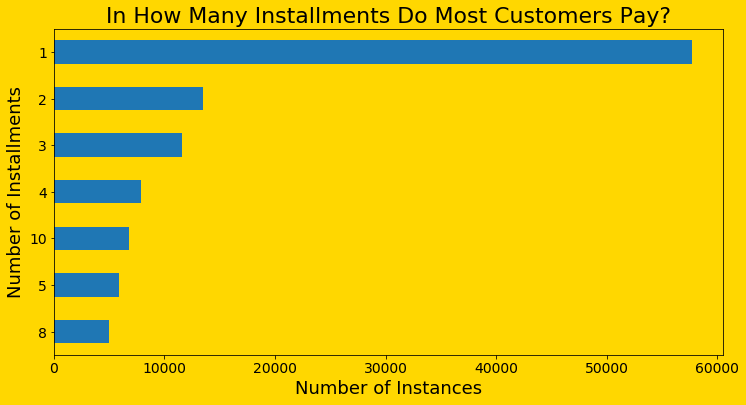

In [214]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_install.plot(kind='barh')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Number of Installments', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('In How Many Installments Do Most Customers Pay?', fontsize=22)
plt.show()

In [213]:
master_df['payment_sequential'].value_counts().sort_values(ascending=False).head(10)

1     110885
2       3309
3        631
4        301
5        181
6        125
7         86
8         56
9         46
10        39
Name: payment_sequential, dtype: int64

In [220]:
top_pay_seq = master_df['payment_sequential'].value_counts().sort_values().tail(5)

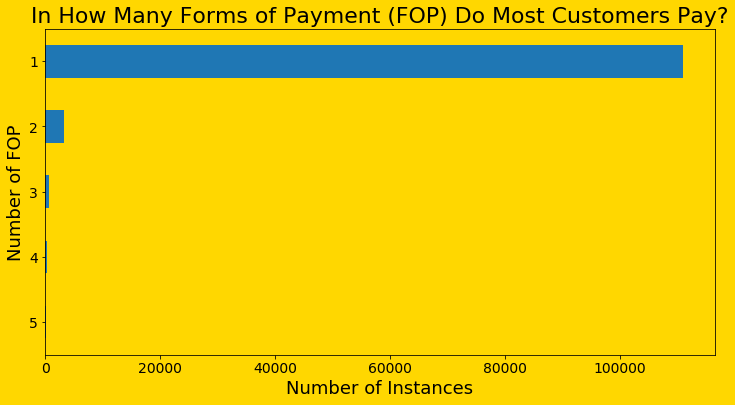

In [222]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_seq.plot(kind='barh')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Number of FOP', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('In How Many Forms of Payment (FOP) Do Most Customers Pay?', fontsize=22)
plt.show()

In [212]:
master_df['category_name'].value_counts().sort_values(ascending=False).head(10)

Bed_Bath_Table           11813
Health_Beauty             9970
Sports_Leisure            8943
Furniture_Decor           8731
Computers_Accessories     8080
Housewares                7346
Watches_Gifts             6200
Telephony                 4721
Garden_Tools              4572
Auto                      4378
Name: category_name, dtype: int64

In [198]:
top_prod_cat = master_df['category_name'].value_counts().sort_values(ascending=True).tail(10)

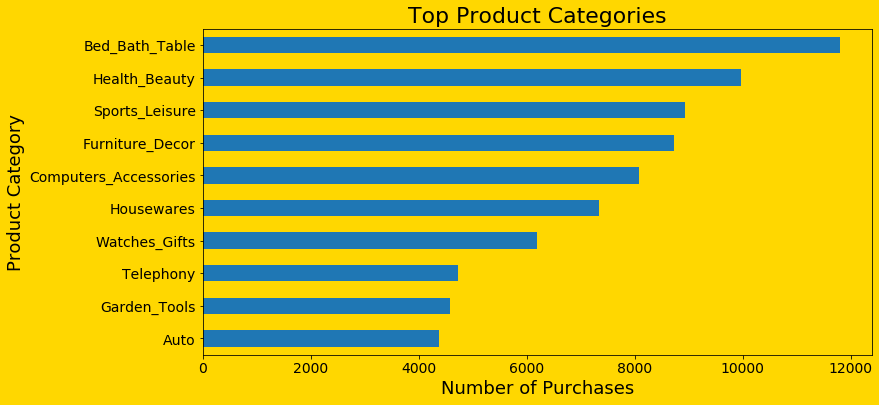

In [199]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_prod_cat.plot(kind='barh')
plt.xlabel('Number of Purchases', fontsize=18)
plt.ylabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Product Categories', fontsize=22)
plt.show()

# Delivery Behavior

In [241]:
master_df['delivery_hours'].value_counts(bins=[0,50,100,200,400,800,1600,2000]).sort_index()

(-0.001, 50.0]      13498
(50.0, 100.0]       16079
(100.0, 200.0]      39584
(200.0, 400.0]      30098
(400.0, 800.0]      11812
(800.0, 1600.0]      2091
(1600.0, 2000.0]       82
Name: delivery_hours, dtype: int64

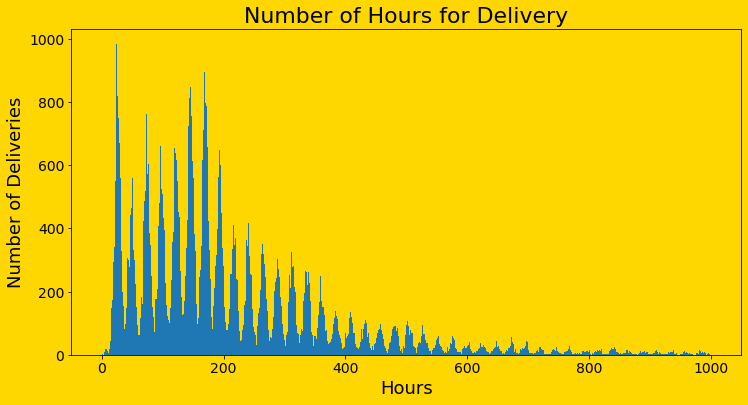

In [273]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_hours'], bins=range(0,1000))
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Hours for Delivery', fontsize=22)
plt.show()

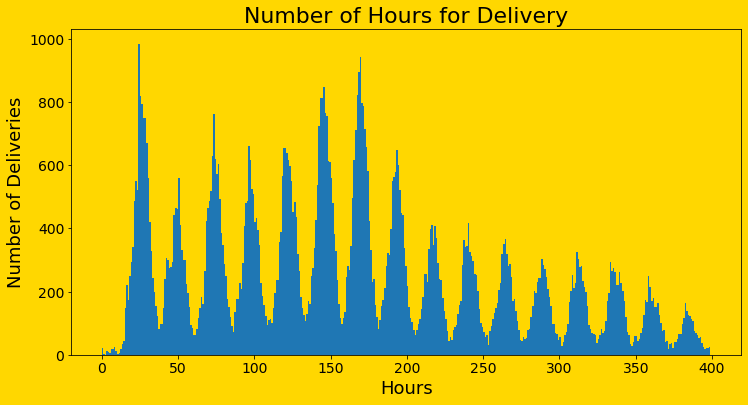

In [271]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_hours'], bins=range(0,400))
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Hours for Delivery', fontsize=22)
plt.show()

In [200]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115820 entries, 0 to 115819
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   order_id                        115820 non-null  object         
 1   customer_id                     115820 non-null  object         
 2   order_status                    115820 non-null  object         
 3   order_purchase_timestamp        115820 non-null  datetime64[ns] 
 4   order_approved                  115820 non-null  datetime64[ns] 
 5   delivered_to_carrier            114617 non-null  datetime64[ns] 
 6   delivered_to_customer           113333 non-null  datetime64[ns] 
 7   estimated_delivery_to_customer  115820 non-null  datetime64[ns] 
 8   order_month_year                115820 non-null  period[M]      
 9   delivery_duration               113333 non-null  timedelta64[ns]
 10  delivery_hours                  113333 non-n